Here, I will try out the method in Johanssons paper to calculate the diffusivity by fitting the time-dependent short-term diffusion constant with
$$D(t)=\frac{d MSD(t)}{dt}= ...$$
So, for this to work, I need to extract the mean squared displacement (MSD) and calculate its derivative.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # color stuff
%matplotlib inline

In [38]:
# Code taken from msdFromTraj.py

def readData(datafile):
    file = open(datafile,'r')
    all_lines = file.readlines()
    i=0
    n=0
    new_data = []
    for i in range(len(all_lines[::1])):
        new_data.append([float(x) for x in all_lines[i].split()])
    file.close()
    return new_data



def makeMSD(dataArr, startInterval, maxTime='', error=False):
    "Create msd array from 2D input data array"
    points = len(dataArr)
    step = (int) (startInterval*1.0/(dataArr[1][0] - dataArr[0][0]))
    N = points//step # This gives the max number of displacements to average over
    if maxTime=='':
        maxPoint = 2000
    else:
        maxPoint = (int)(maxTime*1.0/(dataArr[1][0] - dataArr[0][0]))
    sd = [0] * maxPoint
    msd = [0] * maxPoint
    count = [0] * maxPoint
    if (error):
        msd_err = [0] * maxPoint
    for i in range(N):
        mark = i*step
        # print dataArr[mark][0]
        r0x = dataArr[mark][1]
        r0y = dataArr[mark][2]
        r0z = dataArr[mark][3]
        k=0 
        #for k in xrange(points-mark):
        while (k < ((N-i)*step) and k < maxPoint):
            drx = dataArr[mark+k][1] - r0x
            dry = dataArr[mark+k][2] - r0y
            drz = dataArr[mark+k][3] - r0z
            sqrdisp = drx*drx + dry*dry + drz*drz
            sd[k] += sqrdisp
            if (error):
                msd_err += sqrdisp*sqrdisp
            count[k] += 1
            k+=1
    msd = [sd[i]/count[i] for i in range(maxPoint)]
    return msd


def normMSD(dataArr,msd):
    return [msd[i]/((i+1)*6*(dataArr[1][0] - dataArr[0][0])) for i in xrange(len(msd))]

def makeMSD0t(dataArr, startInterval):
    msd = makeMSD(dataArr,startInterval)
    return normMSD(dataArr,msd)

maxTime=3000
avgInterval=100
data = readData('testtrajectory.txt')
msd = makeMSD(data, avgInterval, maxTime)
MSDfile = open('msd.txt','w')
timestep = (data[1][0] - data[0][0])
#for i in xrange((int)(maxTime*1.0/timestep)):
#    t = i * timestep
#    line = str(t) + '\t' + str(msd[i]) + '\n'
#    MSDfile.write(line)



In [41]:
# calculate the derivative of the msd
dmsd = [(msd[i+1]-msd[i-1])/(2*timestep) for i in range(1,len(msd)-1)]
msdot=[msd[i]/(i*timestep) for i in range(1,len(msd))]

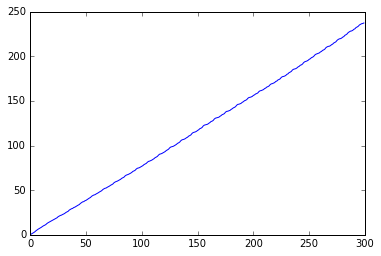

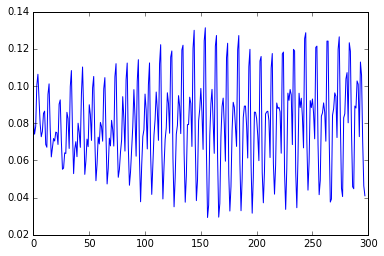

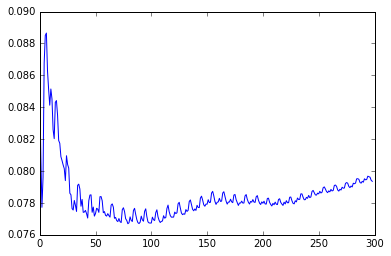

In [42]:
plt.plot(msd)
plt.show()
plt.plot(dmsd)
plt.show()
plt.plot(msdot)

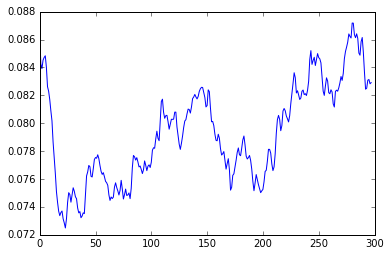

In [37]:
plt.plot(dmsd)